In [2]:
!pip3 install ktrain


     |████████████████████████████████| 25.2MB 1.3MB/s 
     |████████████████████████████████| 421.8MB 20kB/s 
     |████████████████████████████████| 6.7MB 38.5MB/s 
     |████████████████████████████████| 983kB 32.3MB/s 
     |████████████████████████████████| 245kB 39.2MB/s 
     |████████████████████████████████| 675kB 25.7MB/s 
     |████████████████████████████████| 471kB 37.3MB/s 
     |████████████████████████████████| 3.9MB 41.4MB/s 
     |████████████████████████████████| 450kB 33.7MB/s 
     |████████████████████████████████| 1.1MB 39.4MB/s 
     |████████████████████████████████| 3.8MB 38.3MB/s 
     |████████████████████████████████| 890kB 38.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.16.2-cp36-none-any.whl size=25246110 sha256=3bb324cab52ef5017d952445ae4eb80a5e52f71c1ae8d12f0ce7b48967f226fa
  Stored in directory: /root/.cache/pip/wheels/9c/fe/2f/b43d969ccb9f5b25808a4a68d74fe5f40dfac667037d5d75c0
  Created wheel for keras-bert: filename=keras_bert-0.84.0-cp36-no

Importing libraries

In [0]:
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


importing the dataset

In [4]:
from google.colab import files
uploaded_file=files.upload()

Saving emails.csv to emails.csv


In [0]:
import io
spam_df=pd.read_csv(io.BytesIO(uploaded_file['emails.csv']))

Inspecting the dataset

In [6]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [0]:
X=spam_df['text']

In [8]:
X.head()

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

In [0]:
y=spam_df['spam']

In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

(array([4360.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1368.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

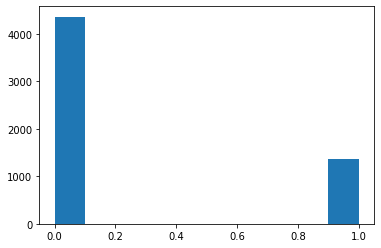

In [11]:
import matplotlib.pyplot as plt
plt.hist(y)

Splitting into training and test data

In [12]:
(X_train,y_train),(X_test,y_test),preproc=text.texts_from_csv('emails.csv',text_column='text',label_columns=['spam'],maxlen=500,preprocess_mode='bert')

detected encoding: utf-8 (if wrong, set manually)
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


CREATING BERT MODEL

In [13]:
bert=text.text_classifier(name='bert',train_data=(X_train,y_train),preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [0]:
learner=ktrain.get_learner(model=bert,train_data=(X_train,y_train),val_data=(X_test,y_test),batch_size=6)

In [15]:
learner.fit_onecycle(lr=2e-5,epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Train on 5155 samples, validate on 573 samples
Epoch 1/2
5155/5155 [==============================] - 650s 126ms/sample - loss: 0.1477 - accuracy: 0.9356 - val_loss: 0.0173 - val_accuracy: 0.9948
Epoch 2/2
5155/5155 [==============================] - 629s 122ms/sample - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0033 - val_accuracy: 1.0000
